# CNN Final Phase 2 - Task 4 - 6

In [2]:
!ls

drive  sample_data


In [3]:
%cd ./drive/MyDrive/data/split_clash/

/content/drive/MyDrive/data/split_clash


# Augmentation

## define generators

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Rescale all images by 1./255
my_augment_generator = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=30,
    zoom_range=[0.8, 1.2],
    width_shift_range=0.3,
    height_shift_range=0.3,
    brightness_range=[0.7, 1.3],
    fill_mode="nearest"
    )

my_generator = ImageDataGenerator(
    rescale=1./255,
    )

In [17]:
test_gen = my_generator.flow_from_directory('test', target_size=(150,150), batch_size=64, class_mode='categorical')
train_gen = my_augment_generator.flow_from_directory('train', target_size=(150,150), batch_size=64, class_mode='categorical')
validation_gen = my_generator.flow_from_directory('validation', target_size=(150,150), batch_size=64, class_mode='categorical')

Found 161 images belonging to 8 classes.
Found 721 images belonging to 8 classes.
Found 160 images belonging to 8 classes.


## Imports

In [44]:
import keras
from keras import layers, regularizers

## Run a functional 5 layer CNN model

In [18]:
inputs = keras.Input(shape=(150, 150, 3))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding="same")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding="same")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding="same")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding="same")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu", padding="same")(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(200, activation="relu")(x)
outputs = layers.Dense(8, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=1e-4),
              metrics=["accuracy"]
              )

In [19]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 9, 9, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 200)            │       102,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │         1,608 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,672,784 (6.38 MB)

 Trainable params: 1,672,784 (6.38 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="augmented.keras",
        save_best_only=True,
        monitor="val_loss",
        verbose=1
        ),
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True,
        verbose=1
    )
]

history = model.fit(
    train_gen,
    epochs=50,
    validation_data=validation_gen,
    callbacks=callbacks)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.1123 - loss: 2.0827
Epoch 1: val_loss improved from inf to 2.07602, saving model to augmented.keras
12/12 ━━━━━━━━━━━━━━━━━━━━ 60s 5s/step - accuracy: 0.1135 - loss: 2.0827 - val_accuracy: 0.2500 - val_loss: 2.0760
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.1428 - loss: 2.0753
Epoch 2: val_loss improved from 2.07602 to 2.06875, saving model to augmented.keras
12/12 ━━━━━━━━━━━━━━━━━━━━ 51s 4s/step - accuracy: 0.1419 - loss: 2.0753 - val_accuracy: 0.1375 - val_loss: 2.0687
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.1569 - loss: 2.0681
Epoch 3: val_loss improved from 2.06875 to 2.05505, saving model to augmented.keras
12/12 ━━━━━━━━━━━━━━━━━━━━ 51s 4s/step - accuracy: 0.1553 - loss: 2.0680 - val_accuracy: 0.1375 - val_loss: 2.0550
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.1849 - loss: 2.0449
Epoch 4: val_loss improved from 2.05505 to 1.96550, saving model to augment

## def plot_model_metrics(data, isLoss, boolean, isAccuracy: boolean)

In [10]:
import matplotlib.pyplot as plt
import numpy as np

def plot_model_metrics(data, isLoss, isAccuracy):
    """
    Plot training and validation accuracy/loss for multiple models over epochs.

    Args:
        data (dict): Dictionary containing model data with structure:
                    {model_name: {'history': {'accuracy': [...], 'loss': [...],
                                             'val_accuracy': [...], 'val_loss': [...]},
                                  'epochs': int}}
        isLoss (boolean): should graph loss
        isAccuracy (boolean): should graph accuracy
    """
    # Create figures for accuracy and loss
    if isAccuracy:
        fig_acc, ax_acc = plt.subplots(figsize=(10, 6))
    if isLoss:
        fig_loss, ax_loss = plt.subplots(figsize=(10, 6))

    # Iterate through each model in the data
    for model_name, model_data in data.items():
        history = model_data.get('history', {})
        epochs = model_data.get('epochs', len(history.get('accuracy', [])))

        # Get training and validation metrics
        accuracy = history.get('accuracy', [])
        val_accuracy = history.get('val_accuracy', [])
        loss = history.get('loss', [])
        val_loss = history.get('val_loss', [])

        # Generate epoch numbers (1 to epochs)
        x = np.arange(1, epochs + 1)

        # Plot training accuracy
        if isAccuracy:
            if accuracy:
                ax_acc.plot(x, accuracy, label=f'{model_name}_train', marker='o', linestyle='-')

            # Plot validation accuracy
            if val_accuracy:
                ax_acc.plot(x, val_accuracy, label=f'{model_name}_val', marker='x', linestyle='--')

        # Plot training loss
        if isLoss:
            if loss:
                ax_loss.plot(x, loss, label=f'{model_name}_train', marker='o', linestyle='-')

            # Plot validation loss
            if val_loss:
                ax_loss.plot(x, val_loss, label=f'{model_name}_val', marker='x', linestyle='--')

    # Configure accuracy plot
    if isAccuracy:
        ax_acc.set_title('Model Accuracy Over Epochs')
        ax_acc.set_xlabel('Epoch')
        ax_acc.set_ylabel('Accuracy')
        ax_acc.grid(True)
        ax_acc.legend()

    # Configure loss plot
    if isLoss:
        ax_loss.set_title('Model Loss Over Epochs')
        ax_loss.set_xlabel('Epoch')
        ax_loss.set_ylabel('Loss')
        ax_loss.grid(True)
        ax_loss.legend()

    plt.show()


## Plot model

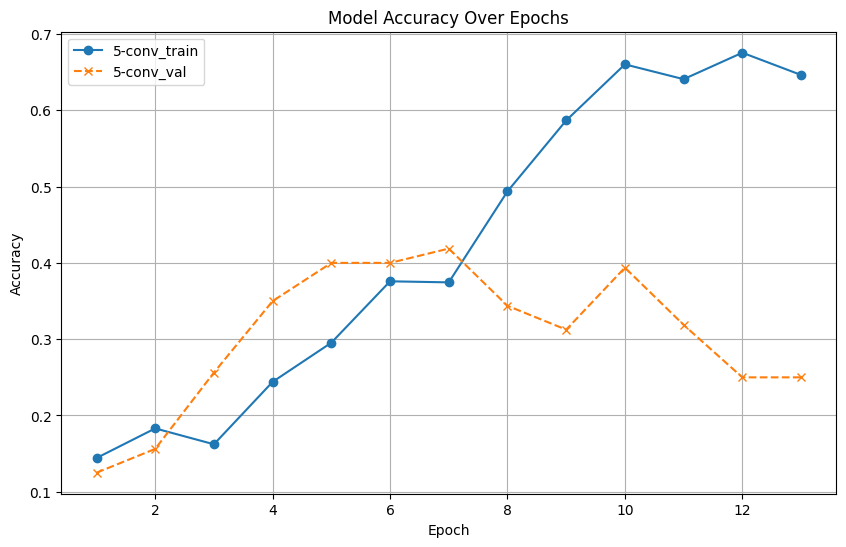

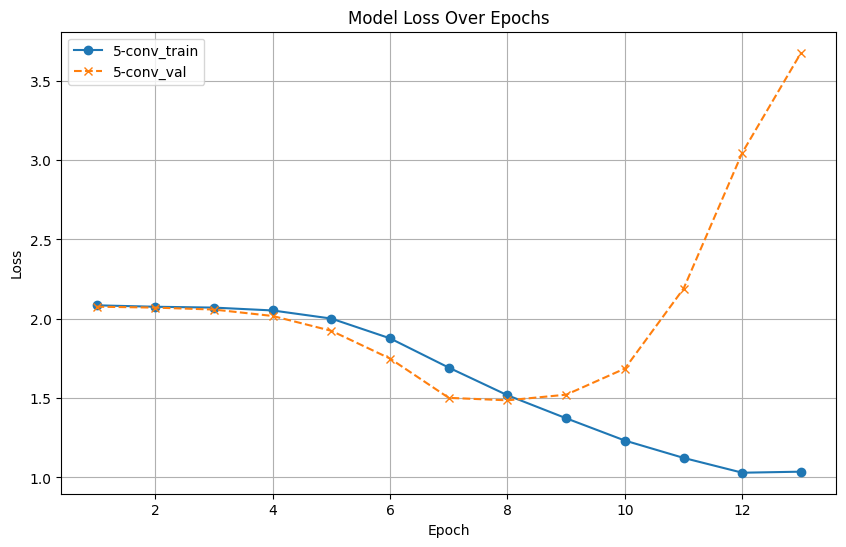

In [12]:
plot_model_metrics({"5-conv": { "history": history.history, "epochs": len(history.history['accuracy']) }}, True, True )

## Sanity test

In [21]:
my_generator = ImageDataGenerator(
    rescale=1./255,
    )

test_gen = my_generator.flow_from_directory('test', target_size=(150,150), batch_size=64, class_mode='categorical')
train_gen = my_generator.flow_from_directory('train', target_size=(150,150), batch_size=64, class_mode='categorical')
validation_gen = my_generator.flow_from_directory('validation', target_size=(150,150), batch_size=64, class_mode='categorical')

inputs = keras.Input(shape=(150, 150, 3))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding="same")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding="same")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding="same")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding="same")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu", padding="same")(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(200, activation="relu")(x)
outputs = layers.Dense(8, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=1e-4),
              metrics=["accuracy"]
              )

model.summary()

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="augmented.keras",
        save_best_only=True,
        monitor="val_loss",
        verbose=0
        ),
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True,
        verbose=0
    )
]

history = model.fit(
    train_gen,
    epochs=50,
    validation_data=validation_gen,
    callbacks=callbacks)

Found 161 images belonging to 8 classes.
Found 721 images belonging to 8 classes.
Found 160 images belonging to 8 classes.


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 9, 9, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 200)            │       102,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │         1,608 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,672,784 (6.38 MB)

 Trainable params: 1,672,784 (6.38 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 57s 5s/step - accuracy: 0.1928 - loss: 2.0794 - val_accuracy: 0.1250 - val_loss: 2.0749
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 47s 4s/step - accuracy: 0.1063 - loss: 2.0751 - val_accuracy: 0.1250 - val_loss: 2.0661
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 47s 4s/step - accuracy: 0.1838 - loss: 2.0616 - val_accuracy: 0.1750 - val_loss: 2.0349
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 46s 4s/step - accuracy: 0.2330 - loss: 2.0206 - val_accuracy: 0.2562 - val_loss: 1.9293
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 46s 4s/step - accuracy: 0.3220 - loss: 1.8856 - val_accuracy: 0.3313 - val_loss: 1.6789
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 46s 4s/step - accuracy: 0.4066 - loss: 1.6697 - val_accuracy: 0.5125 - val_loss: 1.4152
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 47s 4s/step - accuracy: 0.5749 - loss: 1.4106 - val_accuracy: 0.7312 - val_loss: 1.1855
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 47s 4s/step - accuracy: 0.6602 - loss: 1.2349 - val_accuracy: 0.6125 - val_loss:

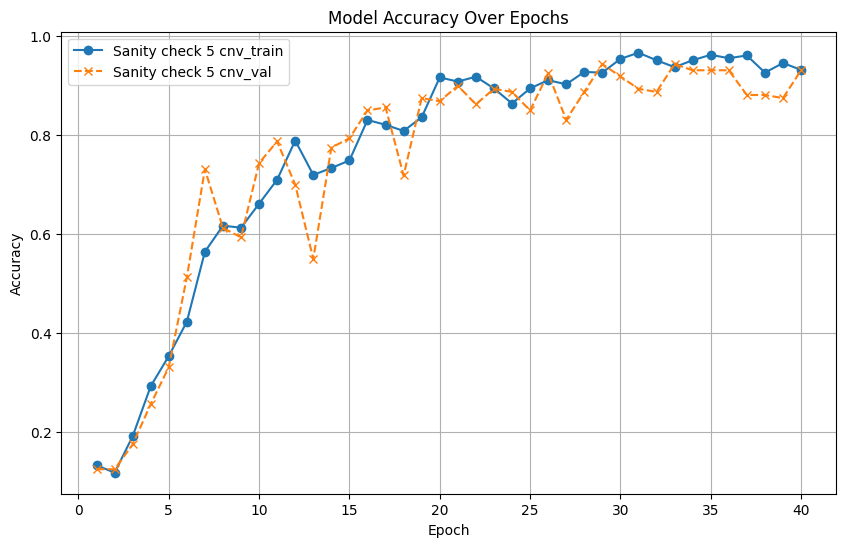

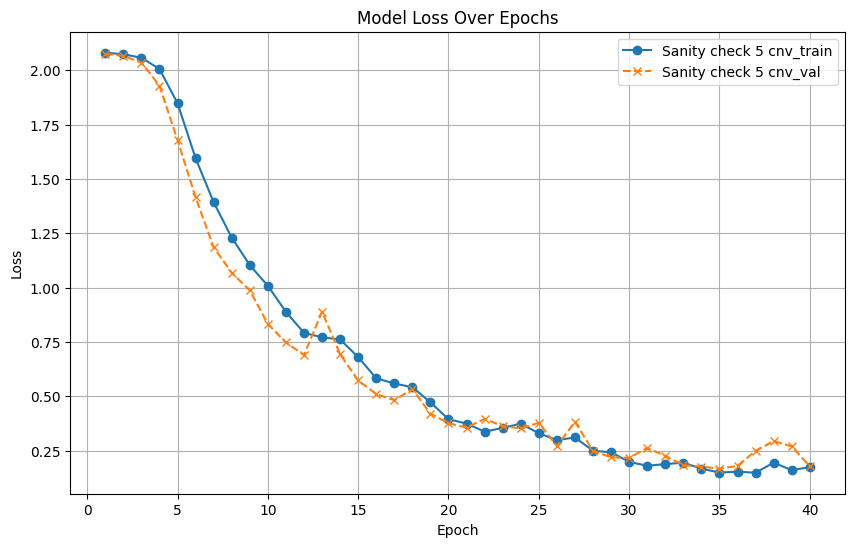

In [22]:
plot_model_metrics({ "Sanity check 5 cnv": { "history": history.history, "epochs": len(history.history['accuracy']) } }, True, True )

In [23]:
test_loss, test_accuracy = model.evaluate(test_gen)
print(f"test accuracy: {test_accuracy:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 33s 11s/step - accuracy: 0.9638 - loss: 0.1351
test accuracy: 0.9627


In [24]:
from sklearn.metrics import classification_report

In [27]:
test_gen_no_shuffle = my_generator.flow_from_directory('test', target_size=(150,150), batch_size=64, class_mode='categorical', shuffle=False)

Found 161 images belonging to 8 classes.


In [28]:
test_loss, test_accuracy = model.evaluate(test_gen_no_shuffle)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.9716 - loss: 0.1105


In [29]:
test_gen_no_shuffle.reset()
CLASS_NAMES = ['th_10', 'th_11', 'th_12', 'th_13', 'th_14', 'th_15', 'th_16', 'th_17']
y_pred = model.predict(test_gen_no_shuffle)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_gen_no_shuffle.classes[:len(y_pred_classes)]
class_report = classification_report(y_true, y_pred_classes, target_names=CLASS_NAMES, output_dict=True)

3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step


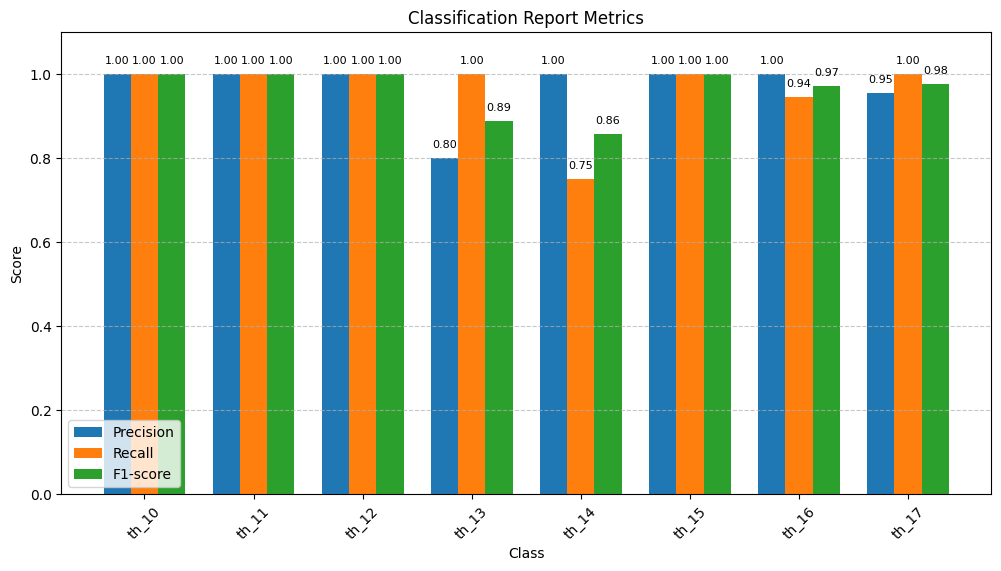

In [30]:
import pandas as pd

 # Extract class names and metrics (exclude 'accuracy', 'macro avg', 'weighted avg')
class_names = [key for key in class_report.keys() if key not in ['accuracy', 'macro avg', 'weighted avg']]
metrics = ['precision', 'recall', 'f1-score']

# Create DataFrame for plotting
data = {
    'Class': [],
    'Metric': [],
    'Value': []
}
for cls in class_names:
    for metric in metrics:
        data['Class'].append(cls)
        data['Metric'].append(metric)
        data['Value'].append(class_report[cls][metric])

df = pd.DataFrame(data)

# Create bar plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot bars for each metric
bar_width = 0.25
x = range(len(class_names))

# Plot precision, recall, f1-score
for i, metric in enumerate(metrics):
    metric_values = df[df['Metric'] == metric]['Value']
    ax.bar([pos + i * bar_width for pos in x], metric_values,
            width=bar_width, label=metric.capitalize(),
            color=['#1f77b4', '#ff7f0e', '#2ca02c'][i])

# Customize plot
ax.set_xlabel('Class')
ax.set_ylabel('Score')
ax.set_title(f'Classification Report Metrics')
ax.set_xticks([pos + bar_width for pos in x])
ax.set_xticklabels(class_names, rotation=45)
ax.set_ylim(0, 1.1)
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.legend()

# Add value labels on top of bars
for i, metric in enumerate(metrics):
    metric_values = df[df['Metric'] == metric]['Value']
    for j, value in enumerate(metric_values):
        ax.text(j + i * bar_width, value + 0.02, f'{value:.2f}',
                ha='center', va='bottom', fontsize=8)

# BatchNormalization

In [31]:
# Rescale all images by 1./255
my_generator_batch_norm = ImageDataGenerator(
    rescale=1./255,
    )

In [32]:
test_gen_batch_norm = my_generator_batch_norm.flow_from_directory('test', target_size=(150,150), batch_size=32, class_mode='categorical')
train_gen_batch_norm = my_generator_batch_norm.flow_from_directory('train', target_size=(150,150), batch_size=32, class_mode='categorical')
validation_gen_batch_norm = my_generator_batch_norm.flow_from_directory('validation', target_size=(150,150), batch_size=32, class_mode='categorical')

Found 161 images belonging to 8 classes.
Found 721 images belonging to 8 classes.
Found 160 images belonging to 8 classes.


In [38]:
y = layers.Conv2D(filters=32, kernel_size=3, use_bias=False)(inputs)
y = layers.BatchNormalization()(y)
y = layers.Activation("relu")(y)
y = layers.MaxPooling2D(pool_size=2)(y)

y = layers.Conv2D(filters=64, kernel_size=3, use_bias=False)(y)
y = layers.BatchNormalization()(y)
y = layers.Activation("relu")(y)
y = layers.MaxPooling2D(pool_size=2)(y)

y = layers.Conv2D(filters=128, kernel_size=3, use_bias=False)(y)
y = layers.BatchNormalization()(y)
y = layers.Activation("relu")(y)
y = layers.MaxPooling2D(pool_size=2)(y)

y = layers.Conv2D(filters=256, kernel_size=3, use_bias=False)(y)
y = layers.BatchNormalization()(y)
y = layers.Activation("relu")(y)
y = layers.MaxPooling2D(pool_size=2)(y)

y = layers.Conv2D(filters=512, kernel_size=3, use_bias=False)(y)
y = layers.BatchNormalization()(y)
y = layers.Activation("relu")(y)

y = layers.GlobalAveragePooling2D()(y)

y = layers.Dense(200, activation="relu")(y)

outputs_batch_norm = layers.Dense(8, activation="softmax")(y)

model_batch_norm = keras.Model(inputs=inputs, outputs=outputs_batch_norm)

model_batch_norm.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [39]:
model_batch_norm.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 148, 148, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 148, 148, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 72, 72, 64)     │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 72, 72, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 72, 72, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 34, 34, 128)    │        73,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 34, 34, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 34, 34, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 15, 15, 256)    │       294,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 15, 15, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 15, 15, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 5, 5, 512)      │     1,179,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 5, 5, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 5, 5, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 200)            │       102,60

 Total params: 1,675,760 (6.39 MB)

 Trainable params: 1,673,776 (6.38 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [40]:
callbacks_batch = [
    keras.callbacks.ModelCheckpoint(
        filepath="batch.keras",
        save_best_only=True,
        monitor="val_loss")
]

history_batch = model_batch_norm.fit(
    train_gen_batch_norm,
    epochs=5,
    validation_data=validation_gen_batch_norm,
    callbacks=callbacks_batch)

Epoch 1/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.6859 - loss: 0.9353 - val_accuracy: 0.1250 - val_loss: 4.9859
Epoch 2/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.9046 - loss: 0.2450 - val_accuracy: 0.1250 - val_loss: 19.4265
Epoch 3/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.9653 - loss: 0.1131 - val_accuracy: 0.1250 - val_loss: 22.7039
Epoch 4/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.9511 - loss: 0.1089 - val_accuracy: 0.1250 - val_loss: 23.0671
Epoch 5/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.9377 - loss: 0.1490 - val_accuracy: 0.1250 - val_loss: 22.8499


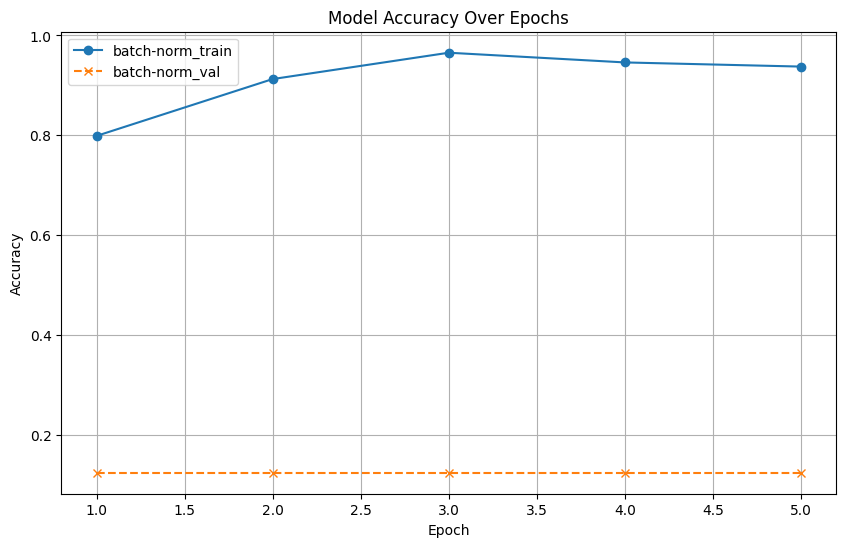

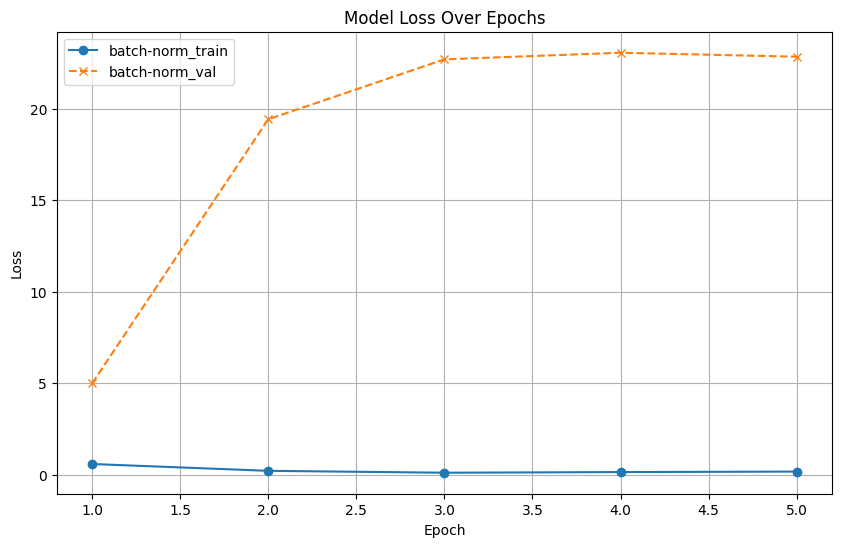

In [41]:
plot_model_metrics({ "batch-norm": { "history": history_batch.history, "epochs": len(history_batch.history["accuracy"]) } }, True, True)

# Regularization

In [45]:
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding="same",
                  kernel_regularizer=regularizers.l2(0.01))(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding="same",
                  kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding="same",
                  kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding="same",
                  kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=512, kernel_size=3, activation="relu", padding="same",
                  kernel_regularizer=regularizers.l2(0.01))(x)

x = layers.GlobalAveragePooling2D()(x)

x = layers.Dense(200, activation="relu",
                 kernel_regularizer=regularizers.l2(0.01))(x)

x = layers.Dropout(0.5)(x)

outputs = layers.Dense(8, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=1e-4),
              metrics=["accuracy"])

In [46]:
model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 9, 9, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_6      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 200)            │       102,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 8)              │         1,608 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,672,784 (6.38 MB)

 Trainable params: 1,672,784 (6.38 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
test_gen = my_generator.flow_from_directory('test', target_size=(150,150), batch_size=64, class_mode='categorical')
train_gen = my_generator.flow_from_directory('train', target_size=(150,150), batch_size=64, class_mode='categorical')
validation_gen = my_generator.flow_from_directory('validation', target_size=(150,150), batch_size=64, class_mode='categorical')

Found 161 images belonging to 8 classes.
Found 721 images belonging to 8 classes.
Found 160 images belonging to 8 classes.


In [48]:

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="regularized.keras",
        save_best_only=True,
        monitor="val_loss",
        verbose=1
        ),
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True,
        verbose=1
    )
]

history = model.fit(
    train_gen,
    epochs=150,
    validation_data=validation_gen,
    callbacks=callbacks)

Epoch 1/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5777 - loss: 2.0743
Epoch 1: val_loss improved from inf to 1.93875, saving model to regularized.keras
12/12 ━━━━━━━━━━━━━━━━━━━━ 53s 5s/step - accuracy: 0.5786 - loss: 2.0736 - val_accuracy: 0.6375 - val_loss: 1.9387
Epoch 2/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5825 - loss: 2.0816
Epoch 2: val_loss improved from 1.93875 to 1.93317, saving model to regularized.keras
12/12 ━━━━━━━━━━━━━━━━━━━━ 47s 4s/step - accuracy: 0.5819 - loss: 2.0812 - val_accuracy: 0.6125 - val_loss: 1.9332
Epoch 3/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5991 - loss: 2.0491
Epoch 3: val_loss did not improve from 1.93317
12/12 ━━━━━━━━━━━━━━━━━━━━ 46s 4s/step - accuracy: 0.5991 - loss: 2.0495 - val_accuracy: 0.6313 - val_loss: 1.9802
Epoch 4/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5593 - loss: 2.1303
Epoch 4: val_loss did not improve from 1.93317
12/12 ━━━━━━━━━━━━━━━━━━━━ 46s 4s/step - accuracy: 0.5606

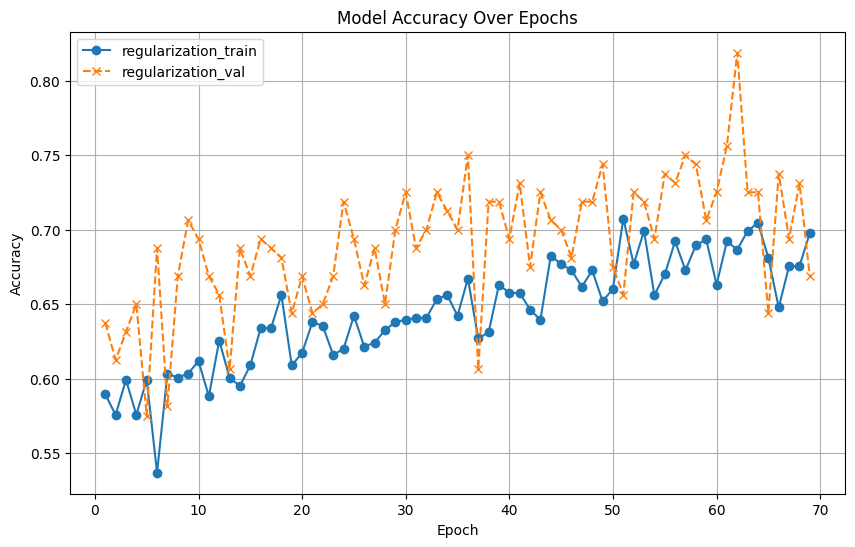

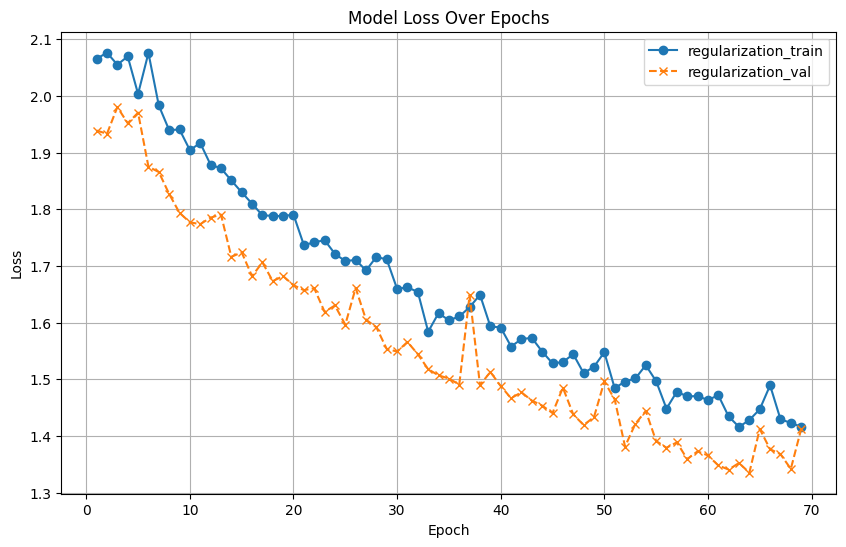

In [49]:
plot_model_metrics({ "regularization": { "history": history.history, "epochs": len(history.history['accuracy']) } }, True, True)

## Regularize only later layers

In [50]:
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding="same")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding="same")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding="same")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding="same")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=512, kernel_size=3, activation="relu", padding="same",
                  kernel_regularizer=regularizers.l2(0.01))(x)

x = layers.GlobalAveragePooling2D()(x)

x = layers.Dense(200, activation="relu",
                 kernel_regularizer=regularizers.l2(0.01))(x)

x = layers.Dropout(0.2)(x)

outputs = layers.Dense(8, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=1e-4),
              metrics=["accuracy"])

In [51]:
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 9, 9, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_7      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 200)            │       102,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 8)              │         1,608 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,672,784 (6.38 MB)

 Trainable params: 1,672,784 (6.38 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="regularized.keras",
        save_best_only=True,
        monitor="val_loss",
        verbose=1
        ),
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True,
        verbose=1
    )
]

history = model.fit(
    train_gen,
    epochs=150,
    validation_data=validation_gen,
    callbacks=callbacks)

Epoch 1/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.1201 - loss: 8.2423
Epoch 1: val_loss improved from inf to 7.88914, saving model to regularized.keras
12/12 ━━━━━━━━━━━━━━━━━━━━ 57s 5s/step - accuracy: 0.1203 - loss: 8.2342 - val_accuracy: 0.1250 - val_loss: 7.8891
Epoch 2/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.1452 - loss: 7.7863
Epoch 2: val_loss improved from 7.88914 to 7.44297, saving model to regularized.keras
12/12 ━━━━━━━━━━━━━━━━━━━━ 46s 4s/step - accuracy: 0.1453 - loss: 7.7781 - val_accuracy: 0.1375 - val_loss: 7.4430
Epoch 3/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.1500 - loss: 7.3359
Epoch 3: val_loss improved from 7.44297 to 7.03258, saving model to regularized.keras
12/12 ━━━━━━━━━━━━━━━━━━━━ 47s 4s/step - accuracy: 0.1492 - loss: 7.3285 - val_accuracy: 0.1375 - val_loss: 7.0326
Epoch 4/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.1391 - loss: 6.9424
Epoch 4: val_loss improved from 7.03258 to 6.65404, saving model 

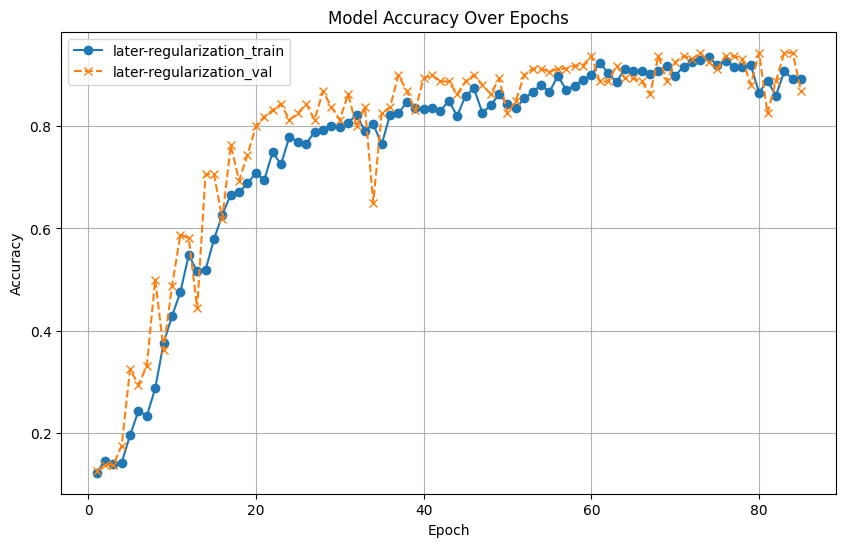

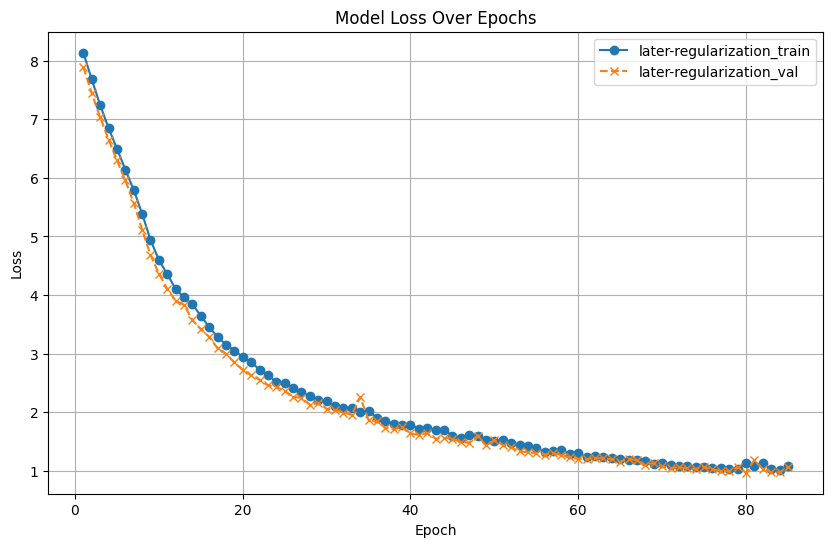

In [53]:
plot_model_metrics({ "later-regularization": { "history": history.history, "epochs": len(history.history['accuracy']) } }, True, True)

In [55]:
from tensorflow.keras.models import load_model

Found 161 images belonging to 8 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.9665 - loss: 0.8914


2/3 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step


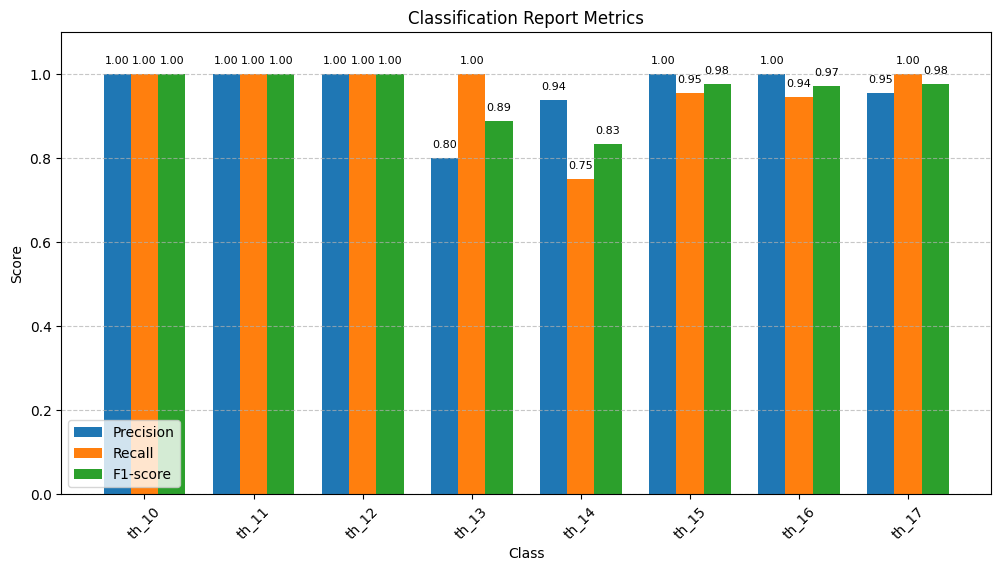

In [56]:
model = load_model('regularized.keras')
test_gen_no_shuffle = my_generator.flow_from_directory('test', target_size=(150,150), batch_size=64, class_mode='categorical', shuffle=False)
test_loss, test_accuracy = model.evaluate(test_gen_no_shuffle)
test_gen_no_shuffle.reset()
CLASS_NAMES = ['th_10', 'th_11', 'th_12', 'th_13', 'th_14', 'th_15', 'th_16', 'th_17']
y_pred = model.predict(test_gen_no_shuffle)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_gen_no_shuffle.classes[:len(y_pred_classes)]
class_report = classification_report(y_true, y_pred_classes, target_names=CLASS_NAMES, output_dict=True)

# Extract class names and metrics (exclude 'accuracy', 'macro avg', 'weighted avg')
class_names = [key for key in class_report.keys() if key not in ['accuracy', 'macro avg', 'weighted avg']]
metrics = ['precision', 'recall', 'f1-score']

# Create DataFrame for plotting
data = {
    'Class': [],
    'Metric': [],
    'Value': []
}
for cls in class_names:
    for metric in metrics:
        data['Class'].append(cls)
        data['Metric'].append(metric)
        data['Value'].append(class_report[cls][metric])

df = pd.DataFrame(data)

# Create bar plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot bars for each metric
bar_width = 0.25
x = range(len(class_names))

# Plot precision, recall, f1-score
for i, metric in enumerate(metrics):
    metric_values = df[df['Metric'] == metric]['Value']
    ax.bar([pos + i * bar_width for pos in x], metric_values,
            width=bar_width, label=metric.capitalize(),
            color=['#1f77b4', '#ff7f0e', '#2ca02c'][i])

# Customize plot
ax.set_xlabel('Class')
ax.set_ylabel('Score')
ax.set_title(f'Classification Report Metrics')
ax.set_xticks([pos + bar_width for pos in x])
ax.set_xticklabels(class_names, rotation=45)
ax.set_ylim(0, 1.1)
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.legend()

# Add value labels on top of bars
for i, metric in enumerate(metrics):
    metric_values = df[df['Metric'] == metric]['Value']
    for j, value in enumerate(metric_values):
        ax.text(j + i * bar_width, value + 0.02, f'{value:.2f}',
                ha='center', va='bottom', fontsize=8)

In [57]:
class_report

{'th_10': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 20.0},
 'th_11': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 20.0},
 'th_12': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 20.0},
 'th_13': {'precision': 0.8,
  'recall': 1.0,
  'f1-score': 0.8888888888888888,
  'support': 20.0},
 'th_14': {'precision': 0.9375,
  'recall': 0.75,
  'f1-score': 0.8333333333333334,
  'support': 20.0},
 'th_15': {'precision': 1.0,
  'recall': 0.9545454545454546,
  'f1-score': 0.9767441860465116,
  'support': 22.0},
 'th_16': {'precision': 1.0,
  'recall': 0.9444444444444444,
  'f1-score': 0.9714285714285714,
  'support': 18.0},
 'th_17': {'precision': 0.9545454545454546,
  'recall': 1.0,
  'f1-score': 0.9767441860465116,
  'support': 21.0},
 'accuracy': 0.9565217391304348,
 'macro avg': {'precision': 0.9615056818181817,
  'recall': 0.9561237373737373,
  'f1-score': 0.9558923957179771,
  'support': 161.0},
 'weighted avg': {'precision': 0.9614624505928

# Residual Network

In [58]:
from tensorflow.keras.utils import plot_model

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_50 (Conv2D)  │ (None, 150, 150,  │        896 │ input_layer_6[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_51 (Conv2D)  │ (None, 150, 150,  │      9,248 │ conv2d_50[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_34    │ (None, 75, 75,    │          0 │ conv2d_51[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_52 (Conv2D)  │ (None, 75, 75,    │        128 │ input_layer_6[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 75, 75,    │          0 │ max_pooling2d_34… │
│                     │ 32)               │            │ conv2d_52[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_53 (Conv2D)  │ (None, 75, 75,    │     18,496 │ add_3[0][0]       │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_54 (Conv2D)  │ (None, 75, 75,    │     36,928 │ conv2d_53[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_35    │ (None, 38, 38,    │          0 │ conv2d_54[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_55 (Conv2D)  │ (None, 38, 38,    │      2,112 │ add_3[0][0]       │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_4 (Add)         │ (None, 38, 38,    │          0 │ max_pooling2d_35… │
│                     │ 64)               │            │ conv2d_55[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_56 (Conv2D)  │ (None, 38, 38,    │     73,856 │ add_4[0][0]       │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_57 (Conv2D)  │ (None, 38, 38,    │    147,584 │ conv2d_56[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_58 (Conv2D)  │ (None, 38, 38,    │      8,320 │ add_4[0][0]       │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_5 (Add)         │ (None, 38, 38,    │          0 │ conv2d_57[0][0],  │
│                     │ 128)              │            │ conv2d_58[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 128)       │          0 │ add_5[0][0]       │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_18 (Dense)    │ (None, 200)       │     25,800 │ global_average_p

 Total params: 324,976 (1.24 MB)

 Trainable params: 324,976 (1.24 MB)

 Non-trainable params: 0 (0.00 B)

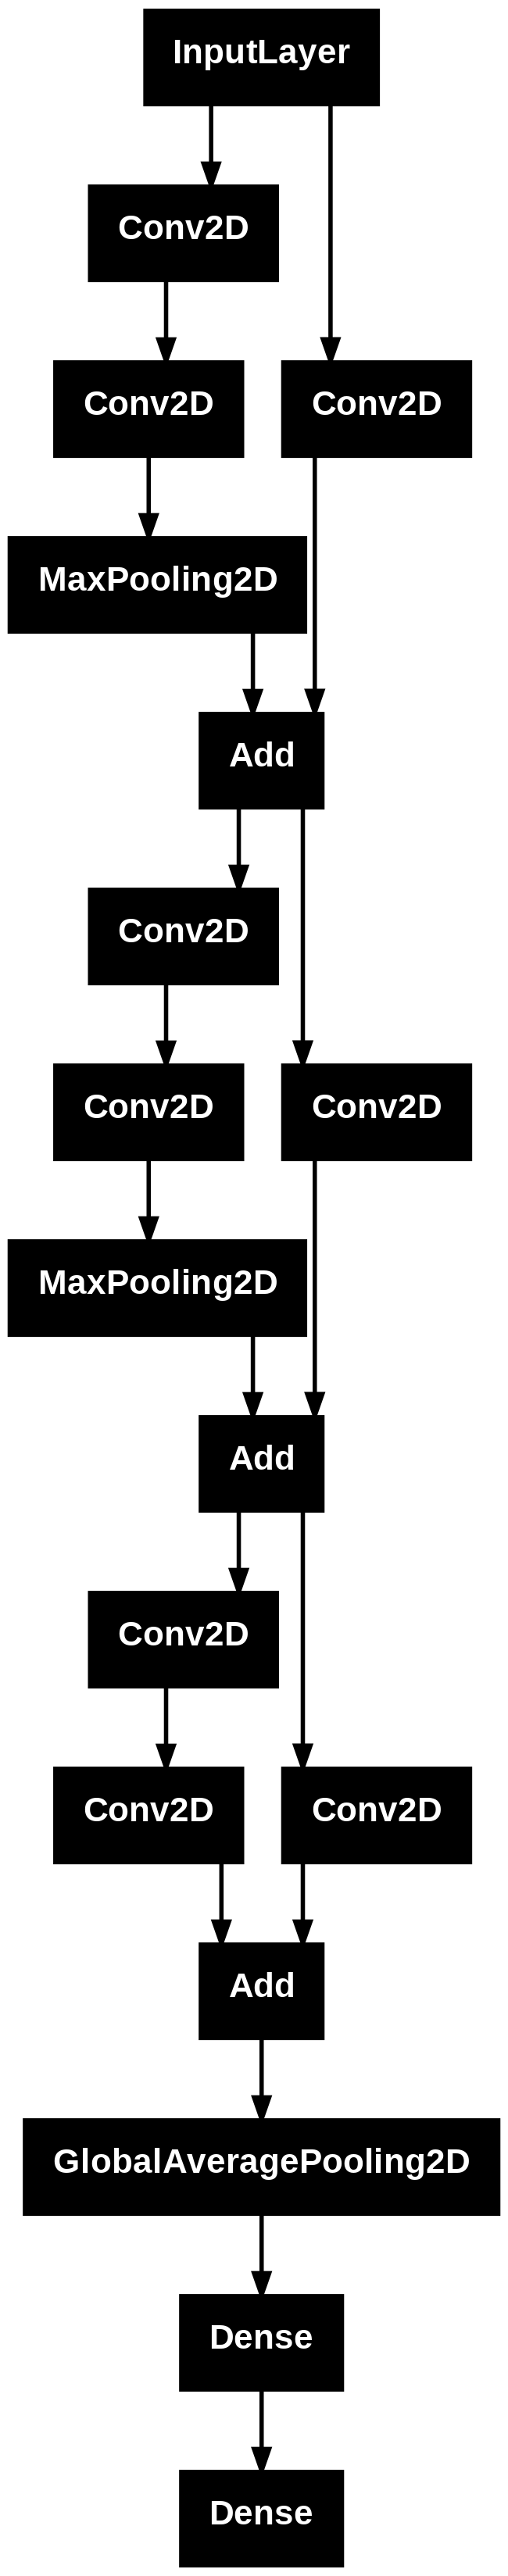

In [61]:
# taken from Deep learning book by Chollet with slight modifications
inputs = keras.Input(shape=(150, 150, 3))
x = inputs

def residual_block(x, filters, pooling=False):
    residual = x
    x = layers.Conv2D(filters, 3, activation="relu", padding="same")(x)
    x = layers.Conv2D(filters, 3, activation="relu", padding="same")(x)
    if pooling:
        x = layers.MaxPooling2D(2, padding="same")(x)
        residual = layers.Conv2D(filters, 1, strides=2)(residual)
    elif filters != residual.shape[-1]:
        residual = layers.Conv2D(filters, 1)(residual)
    x = layers.add([x, residual])
    return x

x = residual_block(x, filters=32, pooling=True)
x = residual_block(x, filters=64, pooling=True)
x = residual_block(x, filters=128, pooling=False)

x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(200, activation="relu")(x)

outputs = layers.Dense(8, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()
plot_model(model)

In [62]:
model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=1e-4),
              metrics=["accuracy"]
              )

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="residual.keras",
        save_best_only=True,
        monitor="val_loss",
        verbose=1
        ),
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True,
        verbose=1
    )
]

history = model.fit(
    train_gen,
    epochs=50,
    validation_data=validation_gen,
    callbacks=callbacks)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.1367 - loss: 2.0857
Epoch 1: val_loss improved from inf to 2.07760, saving model to residual.keras
12/12 ━━━━━━━━━━━━━━━━━━━━ 67s 4s/step - accuracy: 0.1358 - loss: 2.0857 - val_accuracy: 0.1250 - val_loss: 2.0776
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.1297 - loss: 2.0790
Epoch 2: val_loss improved from 2.07760 to 2.07106, saving model to residual.keras
12/12 ━━━━━━━━━━━━━━━━━━━━ 47s 4s/step - accuracy: 0.1292 - loss: 2.0789 - val_accuracy: 0.1250 - val_loss: 2.0711
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.1377 - loss: 2.0675
Epoch 3: val_loss improved from 2.07106 to 2.06104, saving model to residual.keras
12/12 ━━━━━━━━━━━━━━━━━━━━ 47s 4s/step - accuracy: 0.1367 - loss: 2.0676 - val_accuracy: 0.1250 - val_loss: 2.0610
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.2292 - loss: 2.0569
Epoch 4: val_loss improved from 2.06104 to 2.04063, saving model to residual.k

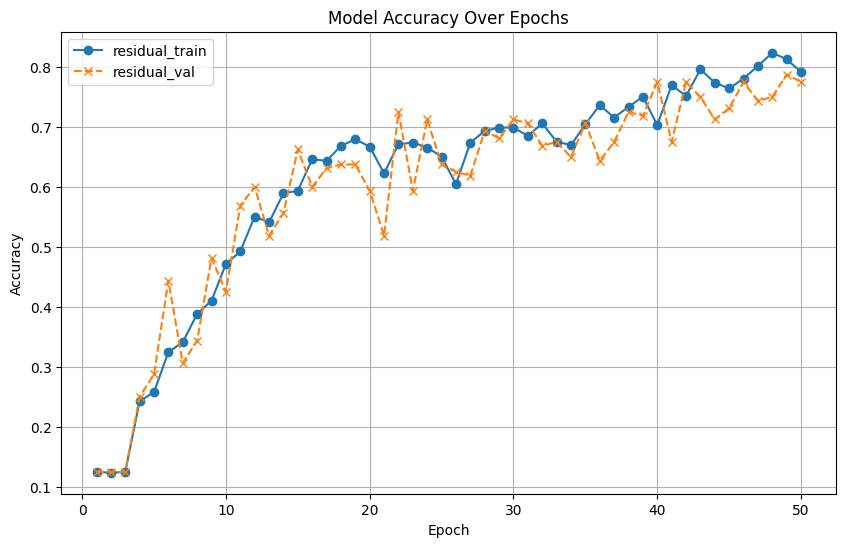

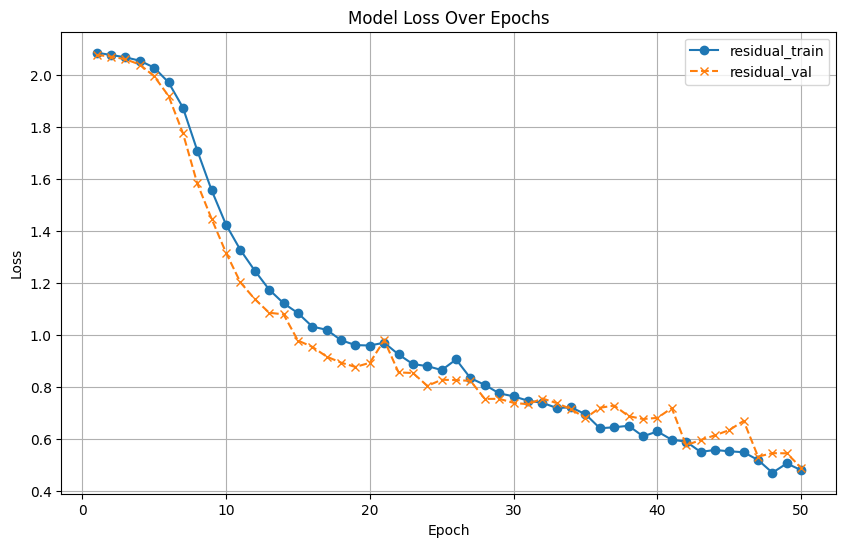

In [63]:
plot_model_metrics({ "residual": { "history": history.history, "epochs": 50 } }, True, True)

## ResNet50

In [64]:
# docs
# https://keras.io/api/applications/resnet/
from tensorflow.keras.applications import ResNet50

In [65]:
my_generator = ImageDataGenerator(
    rescale=1./255,
    )


test_gen = my_generator.flow_from_directory('test', target_size=(224,224), batch_size=64, class_mode='categorical')
train_gen = my_generator.flow_from_directory('train', target_size=(224,224), batch_size=64, class_mode='categorical')
validation_gen = my_generator.flow_from_directory('validation', target_size=(224,224), batch_size=64, class_mode='categorical')


Found 161 images belonging to 8 classes.
Found 721 images belonging to 8 classes.
Found 160 images belonging to 8 classes.


In [66]:
res_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

res_model.trainable = False

inputs = keras.Input(shape=(224,224,3))
x = res_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(200, activation='relu')(x)
outputs = layers.Dense(8, activation='softmax')(x)

model = keras.Model(inputs, outputs)
model.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_10     │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 200)            │       409,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 8)              │         1,608 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,999,120 (91.55 MB)

 Trainable params: 411,408 (1.57 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [67]:
model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=1e-4),
              metrics=["accuracy"]
              )

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="res-net.keras",
        save_best_only=True,
        monitor="val_loss",
        verbose=1
        ),
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True,
        verbose=1
    )
]

history = model.fit(
    train_gen,
    epochs=50,
    validation_data=validation_gen,
    callbacks=callbacks)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.1085 - loss: 2.2341
Epoch 1: val_loss improved from inf to 2.04431, saving model to res-net.keras
12/12 ━━━━━━━━━━━━━━━━━━━━ 74s 6s/step - accuracy: 0.1096 - loss: 2.2292 - val_accuracy: 0.2250 - val_loss: 2.0443
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.2208 - loss: 2.0294
Epoch 2: val_loss improved from 2.04431 to 1.99894, saving model to res-net.keras
12/12 ━━━━━━━━━━━━━━━━━━━━ 49s 4s/step - accuracy: 0.2207 - loss: 2.0292 - val_accuracy: 0.3688 - val_loss: 1.9989
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3782 - loss: 1.9978
Epoch 3: val_loss improved from 1.99894 to 1.97182, saving model to res-net.keras
12/12 ━━━━━━━━━━━━━━━━━━━━ 48s 4s/step - accuracy: 0.3776 - loss: 1.9976 - val_accuracy: 0.3812 - val_loss: 1.9718
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3665 - loss: 1.9803
Epoch 4: val_loss improved from 1.97182 to 1.94720, saving model to res-net.keras

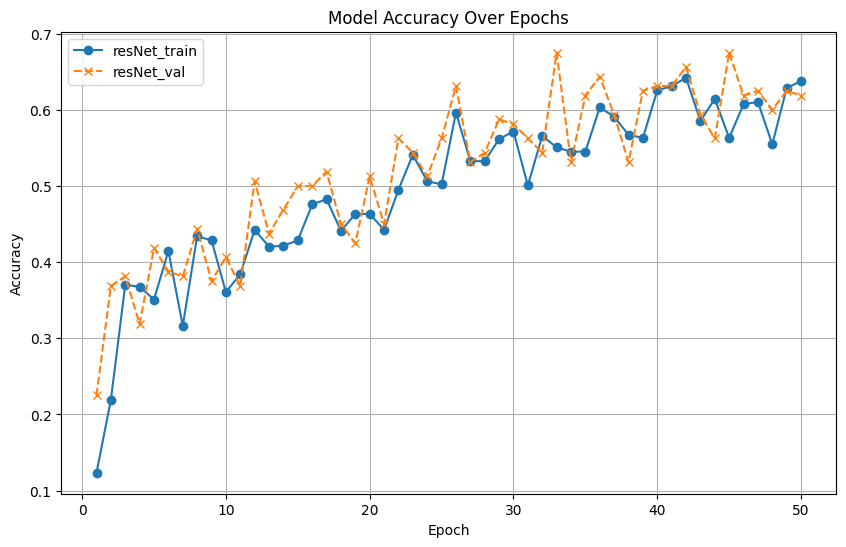

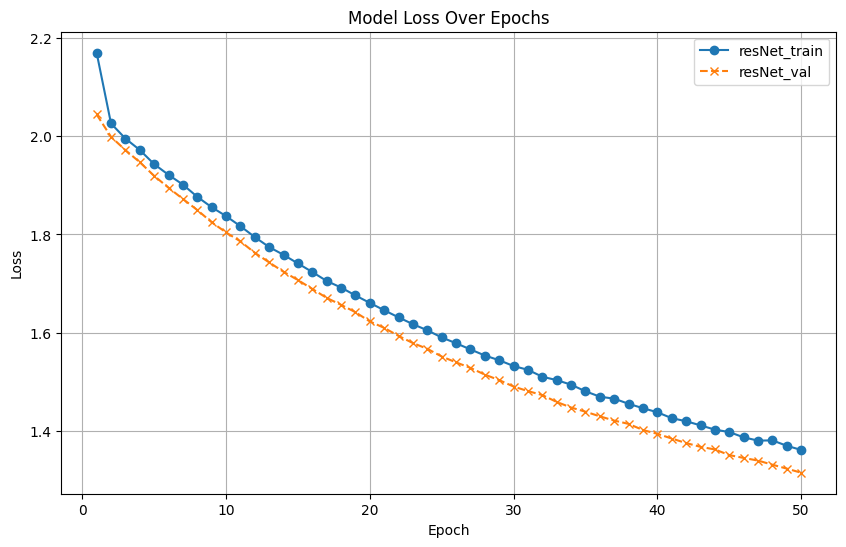

In [68]:
plot_model_metrics({ "resNet": { "history": history.history, "epochs": len(history.history['accuracy']) } }, True, True)

## ResNet with some layers trainable

In [76]:
len(res_model.layers)

175

In [79]:
res_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

res_model.trainable = True

for layer in res_model.layers[:174]:
    layer.trainable = False

inputs = keras.Input(shape=(224,224,3))
x = res_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(200, activation='relu')(x)
outputs = layers.Dense(8, activation='softmax')(x)

model = keras.Model(inputs, outputs)
model.summary()

Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_18 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_15     │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 200)            │       409,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 8)              │         1,608 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,999,120 (91.55 MB)

 Trainable params: 411,408 (1.57 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [80]:
model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=1e-4),
              metrics=["accuracy"]
              )

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="res-net-trainable-layers.keras",
        save_best_only=True,
        monitor="val_loss",
        verbose=1
        ),
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True,
        verbose=1
    )
]

history = model.fit(
    train_gen,
    epochs=100,
    validation_data=validation_gen,
    callbacks=callbacks)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.1126 - loss: 2.3260
Epoch 1: val_loss improved from inf to 2.09930, saving model to res-net-trainable-layers.keras
12/12 ━━━━━━━━━━━━━━━━━━━━ 66s 5s/step - accuracy: 0.1139 - loss: 2.3174 - val_accuracy: 0.1688 - val_loss: 2.0993
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.1953 - loss: 2.0862
Epoch 2: val_loss improved from 2.09930 to 2.05218, saving model to res-net-trainable-layers.keras
12/12 ━━━━━━━━━━━━━━━━━━━━ 48s 4s/step - accuracy: 0.1944 - loss: 2.0858 - val_accuracy: 0.1625 - val_loss: 2.0522
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.1934 - loss: 2.0421
Epoch 3: val_loss improved from 2.05218 to 2.02130, saving model to res-net-trainable-layers.keras
12/12 ━━━━━━━━━━━━━━━━━━━━ 48s 4s/step - accuracy: 0.1949 - loss: 2.0424 - val_accuracy: 0.2937 - val_loss: 2.0213
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3023 - loss: 2.0272
Epoch 4: val_loss improved

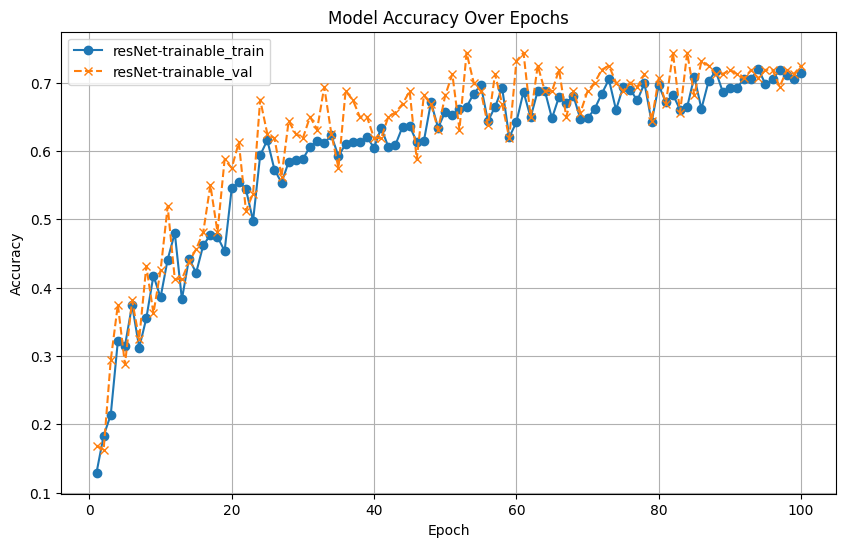

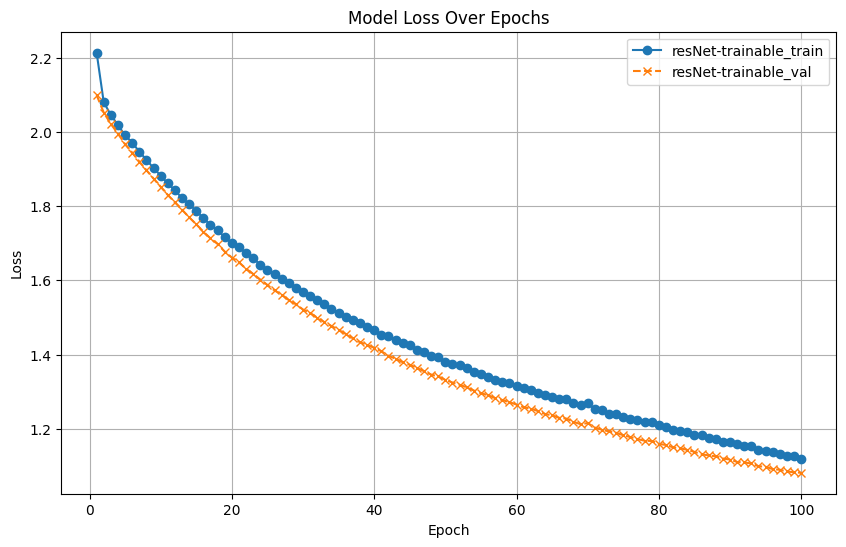

In [81]:
plot_model_metrics({ "resNet-trainable": { "history": history.history, "epochs": len(history.history['accuracy']) } }, True, True)